In [1]:
# 🔄 1. Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 📚 2. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

# 📂 3. Cargar el archivo
ruta = '/content/drive/MyDrive/MP_20251/Data_junto.xlsx'
df = pd.read_excel(ruta)


Mounted at /content/drive


In [2]:
# ✅ 4. Definir columnas numéricas predictoras y las que se imputarán
input_features = [
    'PM10_CAR', 'PM2_5_CAR', 'NO2_CAR',
    'PM10_CM', 'PM2_5_CM', 'NO2_CM',
    'PM10_VMT', 'PM2_5_VMT', 'NO2_VMT',
    'PM10_SJL', 'PM2_5_SJL', 'NO2_SJL',
    'PM10_SMP', 'PM2_5_SMP', 'NO2_SMP',
    'PM10_SA', 'PM2_5_SA', 'NO2_SA',
    'PM10_SB', 'PM2_5_SB', 'NO2_SB'
]
target_to_impute = [
    'PM10_CAR', 'PM2_5_CAR', 'NO2_CAR',
    'PM10_CM', 'PM2_5_CM', 'NO2_CM',
    'PM10_VMT', 'PM2_5_VMT', 'NO2_VMT',
    'PM10_SJL', 'PM2_5_SJL', 'NO2_SJL',
    'PM10_SMP', 'PM2_5_SMP', 'NO2_SMP',
    'PM10_SA', 'PM2_5_SA', 'NO2_SA',
    'PM10_SB', 'PM2_5_SB', 'NO2_SB'
]

In [7]:
# 📊 5. División 75% train / 25% test (manteniendo orden)
split_index = int(len(df) * 0.75)
train_df = df.iloc[:split_index].copy()
test_df = df.iloc[split_index:].copy()

# 📈 6. Imputación en train
imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=10, max_depth=5, random_state=42),
    max_iter=10,
    random_state=42,
    initial_strategy='mean'# Estrategia inicial
)

train_imputed = imputer.fit_transform(train_df[input_features])
train_imputed_df = pd.DataFrame(train_imputed, columns=input_features, index=train_df.index)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [8]:
# 📈 7. Imputación en test (usar modelo aprendido)
test_imputed = imputer.transform(test_df[input_features])
test_imputed_df = pd.DataFrame(test_imputed, columns=input_features, index=test_df.index)

# ➕ 8. Agregar columnas imputadas
for col in target_to_impute:
    train_df[col + '_IMP'] = train_imputed_df[col]
    test_df[col + '_IMP'] = test_imputed_df[col]

# 🔗 9. Unir ambos DataFrames
df_final = pd.concat([train_df, test_df], axis=0)

# 📊 10. Estadísticas antes y después de imputar (por grupo)
def estadisticas(df, group):
    print(f"\n📊 Estadísticas de {group} - ANTES de imputar")
    print(df[target_to_impute].describe())
    print(f"\n❌ Porcentaje de NaNs en {group}:")
    print(df[target_to_impute].isna().mean() * 100)

    print(f"\n📊 Estadísticas de {group} - DESPUÉS de imputar")
    print(df[[col + '_IMP' for col in target_to_impute]].describe())

print("🔍 Análisis Train:")
estadisticas(train_df, 'train')
print("🔍 Análisis Test:")
estadisticas(test_df, 'test')


🔍 Análisis Train:

📊 Estadísticas de train - ANTES de imputar
           PM10_CAR     PM2_5_CAR       NO2_CAR       PM10_CM      PM2_5_CM  \
count  36651.000000  28995.000000  32872.000000  51109.000000  47010.000000   
mean      80.049679     24.733802     20.254390     32.031126     16.734842   
std       37.186258     16.008138     12.843303     17.756367      9.267438   
min        6.620000      3.000000      0.000000      5.070000      3.000000   
25%       53.970000     15.000000     11.500000     19.840000     10.600000   
50%       75.170000     21.400000     18.500000     28.040000     14.510000   
75%      100.115000     30.205000     26.700000     39.480000     20.290000   
max      712.700000    285.600000    145.200000    259.000000     98.700000   

             NO2_CM      PM10_VMT     PM2_5_VMT       NO2_VMT      PM10_SJL  \
count  20597.000000  32425.000000  29261.000000  22844.000000  34627.000000   
mean      20.908593    121.798876     25.405037     18.452880     82

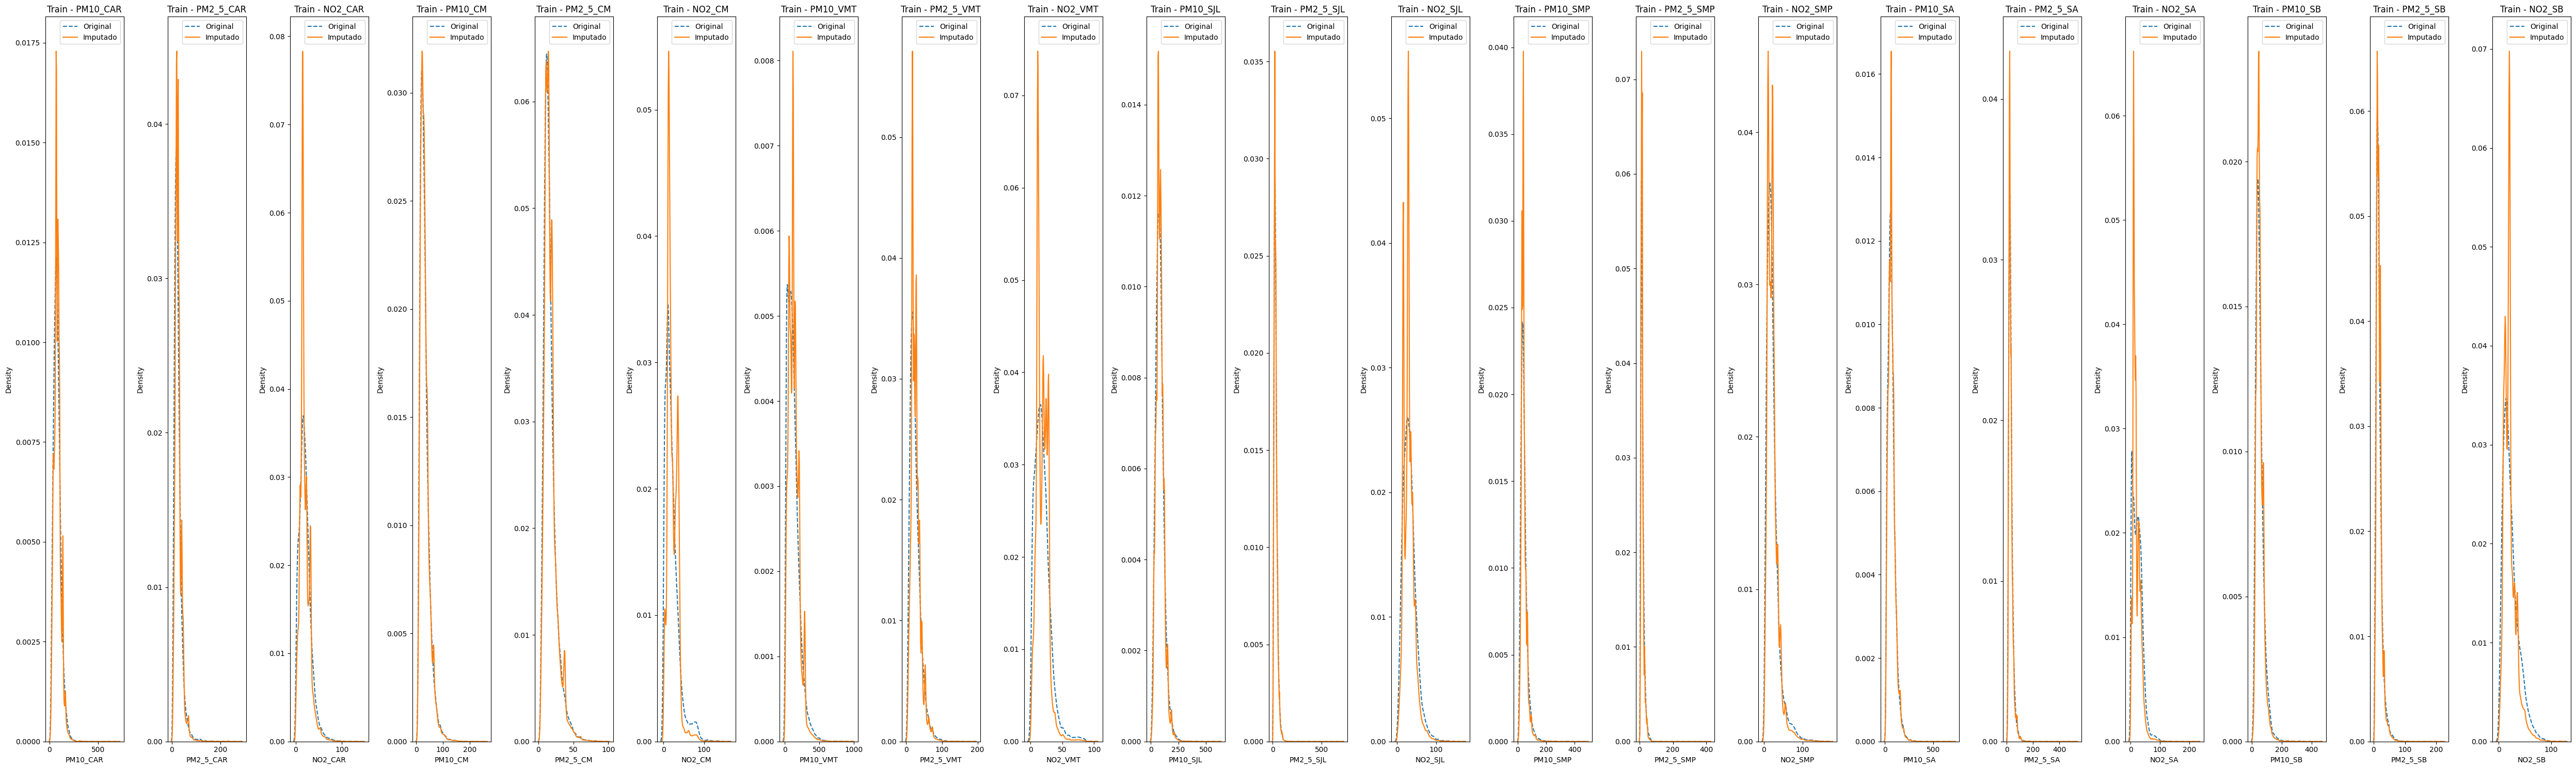

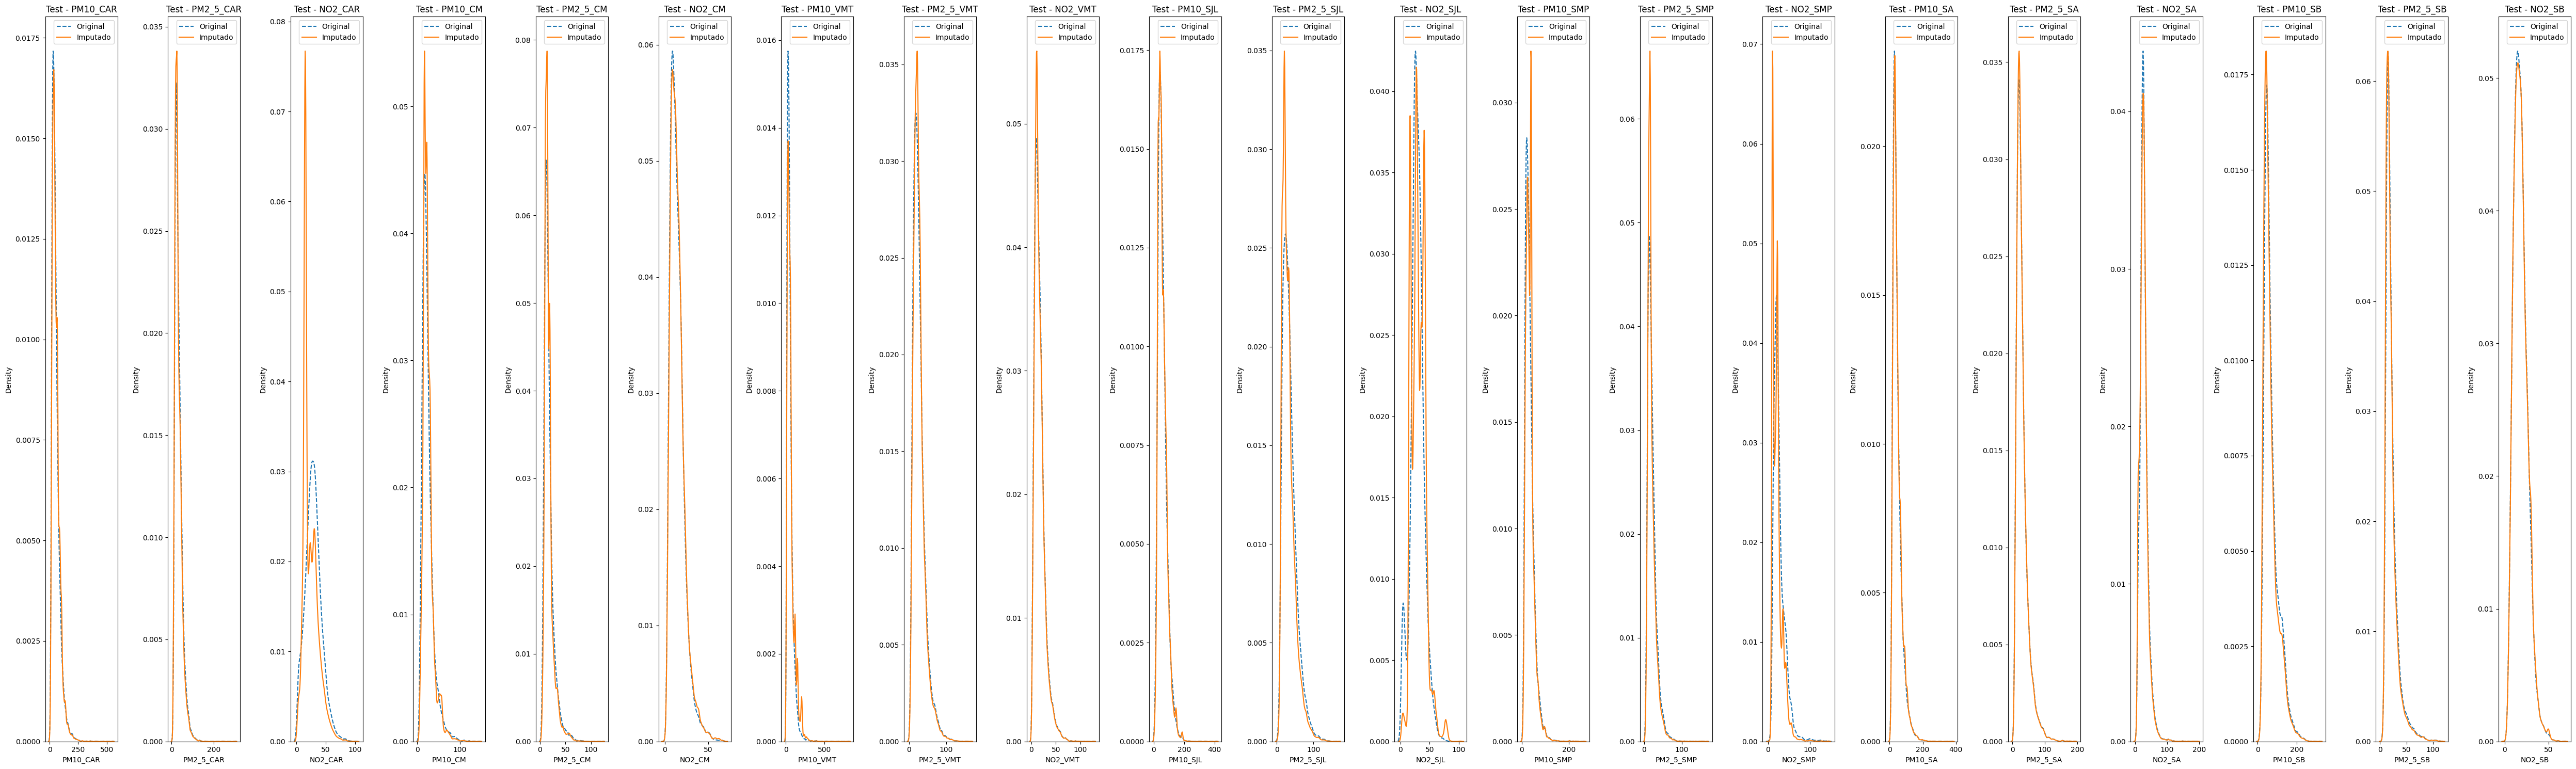

In [15]:

# 📈 11. Gráficas comparativas para train/test
for group_df, label in zip([train_df, test_df], ['Train', 'Test']):
    plt.figure(figsize=(50, 15))
    for i, col in enumerate(target_to_impute):
        plt.subplot(1, 21, i + 1)
        sns.kdeplot(group_df[col], label='Original', linestyle='--')
        sns.kdeplot(group_df[col + '_IMP'], label='Imputado')
        plt.title(f'{label} - {col}')
        plt.legend()
    plt.tight_layout()
    plt.show()




In [16]:
# 💾 12. Exportar resultado final a Excel
export_path = '/content/drive/MyDrive/MP_20251/Data_junto_imputadoRF_21.xlsx'
df_final.to_excel(export_path, index=False)
print(f"✅ Archivo exportado correctamente: {export_path}")

✅ Archivo exportado correctamente: /content/drive/MyDrive/MP_20251/Data_junto_imputadoRF_21.xlsx


In [ ]:
# 📊 10. Estadísticas antes y después de imputar (por grupo)
def calcular_estadisticas(df, group):
    stats = {}

    # Antes de imputar
    stats['antes'] = df[target_to_impute].describe().T
    stats['porcentaje_nan'] = df[target_to_impute].isna().mean().rename('% NaN') * 100

    # Después de imputar
    stats['despues'] = df[[col + '_IMP' for col in target_to_impute]].describe().T

    return stats

# 🔍 Obtener estadísticas para ambos grupos
train_stats = calcular_estadisticas(train_df, 'train')
test_stats = calcular_estadisticas(test_df, 'test')

# 💾 11. Exportar a Excel (múltiples hojas)
with pd.ExcelWriter('/content/drive/MyDrive/MP_20251/Estadisticas_Imputacion.xlsx') as writer:
    train_stats['antes'].to_excel(writer, sheet_name='Train_Antes')
    train_stats['porcentaje_nan'].to_frame().to_excel(writer, sheet_name='Train_%NaN')
    train_stats['despues'].to_excel(writer, sheet_name='Train_Despues')

    test_stats['antes'].to_excel(writer, sheet_name='Test_Antes')
    test_stats['porcentaje_nan'].to_frame().to_excel(writer, sheet_name='Test_%NaN')
    test_stats['despues'].to_excel(writer, sheet_name='Test_Despues')

print("✅ Archivo exportado a: /content/drive/MyDrive/MP_20251/Estadisticas_Imputacion.xlsx")


✅ Archivo exportado a: /content/drive/MyDrive/MP_20251/Estadisticas_Imputacion.xlsx
